In [ ]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sales_df = pd.read_csv("datos_de_ventas.csv")

In [ ]:
X_train = sales_df['Temperature']
Y_train = sales_df['Revenue']

<Axes: xlabel='Temperature', ylabel='Revenue'>

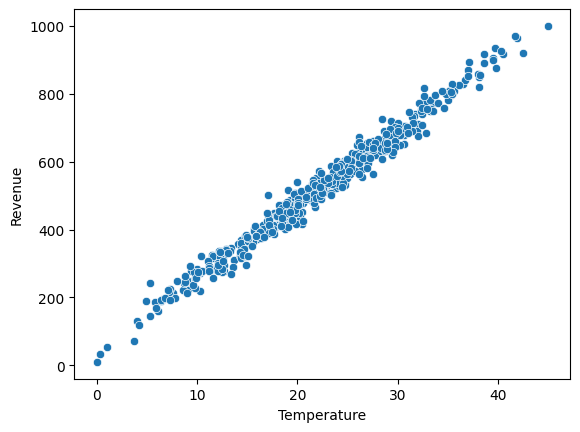

In [ ]:
sns.scatterplot(x=sales_df['Temperature'], y=sales_df['Revenue'])


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')

In [ ]:
epoch_hist = model.fit(X_train, Y_train, epochs=1000)

Epoch 1/1000
16/16 [==============================] - 1s 3ms/step - loss: 280441.5938
Epoch 2/1000
16/16 [==============================] - 0s 3ms/step - loss: 240976.4219
Epoch 3/1000
16/16 [==============================] - 0s 3ms/step - loss: 205639.0469
Epoch 4/1000
16/16 [==============================] - 0s 3ms/step - loss: 174068.4844
Epoch 5/1000
16/16 [==============================] - 0s 3ms/step - loss: 146447.4688
Epoch 6/1000
16/16 [==============================] - 0s 3ms/step - loss: 122387.0703
Epoch 7/1000
16/16 [==============================] - 0s 4ms/step - loss: 101478.9219
Epoch 8/1000
16/16 [==============================] - 0s 6ms/step - loss: 83578.7812
Epoch 9/1000
16/16 [==============================] - 0s 6ms/step - loss: 68240.2031
Epoch 10/1000
16/16 [==============================] - 0s 6ms/step - loss: 55414.5352
Epoch 11/1000
16/16 [==============================] - 0s 9ms/step - loss: 44558.1133
Epoch 12/1000
16/16 [==============================] - 0

In [ ]:
keys = epoch_hist.history.keys()
print(keys)

dict_keys(['loss'])


Text(0.5, 1.0, 'Progreso de perdida durante el entrenamiento del modelo')

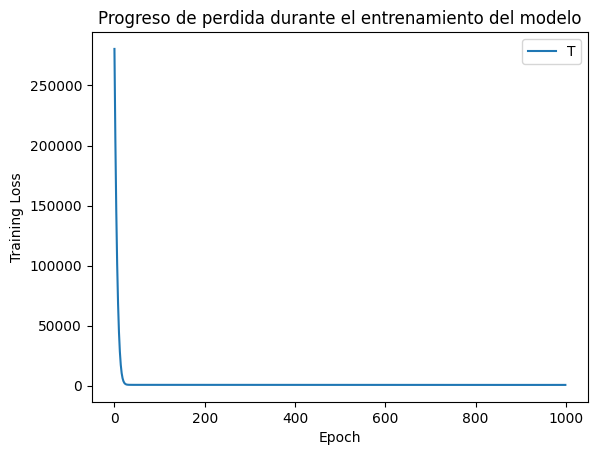

In [ ]:
plt.plot(epoch_hist.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend('Training Loss')
plt.title('Progreso de perdida durante el entrenamiento del modelo')

In [ ]:
weights = model.get_weights()
print(weights)

[array([[21.493864]], dtype=float32), array([44.866898], dtype=float32)]


In [ ]:
Temp = 50
Revenue = model.predict([Temp])
print('La ganancia segun la red neutiral sera de: ', Revenue)

1/1 [==============================] - 0s 60ms/step
La ganancia segun la red neutiral sera de:  [[1119.5602]]


16/16 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Gamamcoa generada vs temperatura @Empresa de Helados')

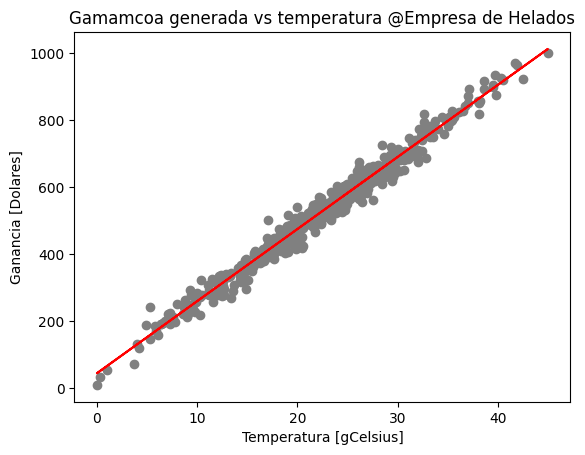

In [ ]:
#grafico de prediccion
plt.scatter(X_train, Y_train, color='gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.ylabel('Ganancia [Dolares]')
plt.xlabel('Temperatura [gCelsius]')
plt.title('Gamamcoa generada vs temperatura @Empresa de Helados')